<a href="https://colab.research.google.com/github/krishnamhn009/datascience/blob/master/Car_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Car Acceptability 

In [34]:
#import necessary libraries
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [35]:
#read the data from file
filename='car.data'
carDataFrame = pd.read_csv(filename)


In [36]:
#check for null values
carDataFrame.isnull().sum()


vhigh      0
vhigh.1    0
2          0
2.1        0
small      0
low        0
unacc      0
dtype: int64

In [37]:
#summary
carDataFrame.describe()


,vhigh,vhigh.1,2,2.1,small,low,unacc
count,1727,1727,1727,1727,1727,1727,1727
unique,4,4,4,3,3,3,4
top,med,med,4,4,big,med,unacc
freq,432,432,432,576,576,576,1209


In [38]:
#info of the dataset
carDataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1727 entries, 0 to 1726
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   vhigh    1727 non-null   object
 1   vhigh.1  1727 non-null   object
 2   2        1727 non-null   object
 3   2.1      1727 non-null   object
 4   small    1727 non-null   object
 5   low      1727 non-null   object
 6   unacc    1727 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [39]:
#checking for numerical and categorical attributes
continuous_attributes = carDataFrame.select_dtypes(include = np.number).columns.tolist() 
categorical_attributes = carDataFrame.select_dtypes(include = np.object).columns.tolist()

print(continuous_attributes)
print(categorical_attributes)

[]
['vhigh', 'vhigh.1', '2', '2.1', 'small', 'low', 'unacc']


In [41]:
#plotting distribution of attributes
maint = sns.countplot(x="maint",hue="Condition",  data=df)

ValueError: ignored

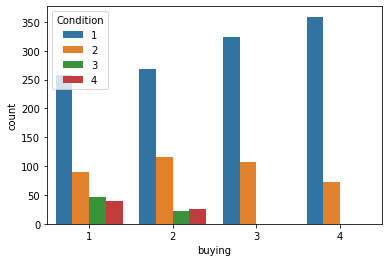

In [42]:
##plotting distribution of attributes
buying = sns.countplot(x="buying",hue="Condition",  data=df)

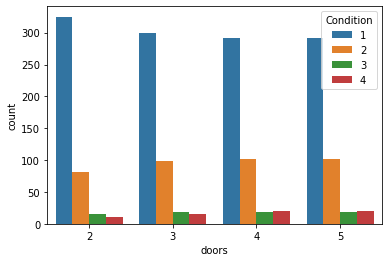

In [43]:
#plotting distribution of attributes
doors = sns.countplot(x="doors",hue="Condition",  data=df)

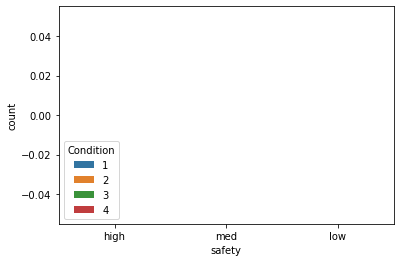

In [44]:
#plotting distribution of attributes
safety = sns.countplot(x="safety",hue="Condition",  data=df, order=['high', 'med', 'low'])

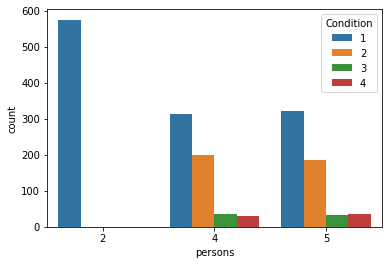

In [45]:
#plotting distribution of attributes
passengers = sns.countplot(x="persons",hue="Condition",  data=df)

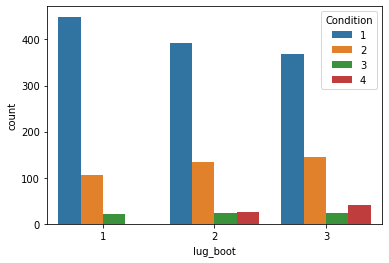

In [46]:
#plotting distribution of attributes
lug_boot = sns.countplot(x="lug_boot",hue="Condition",  data=df)

In [47]:
#converting categorical variables into numerical variables
df['buying'] = df['buying'].map({'low': 1, 'med': 2, 'high' : 3, 'vhigh': 4})
df['maint'] = df['maint'].map({'low': 1, 'med': 2, 'high' : 3, 'vhigh': 4})
df['safety'] = df['safety'].map({'low': 1, 'med': 2, 'high' : 3})
df['lug_boot'] = df['lug_boot'].map({'small': 1, 'med': 2, 'big' : 3})
df['persons'] = df['persons'].map({'2': 2, '4' : 4, 'more' : 5})
df['doors'] = df['doors'].map({'2': 2, '3':3, '4':4, '5more' : 5})
df['Condition'] = df['Condition'].map({'unacc': 1, 'acc': 2, 'good' : 3, 'vgood': 4})

/usr/local/lib/python3.7/dist-packages/seaborn/matrix.py:194: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
/usr/local/lib/python3.7/dist-packages/seaborn/matrix.py:199: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


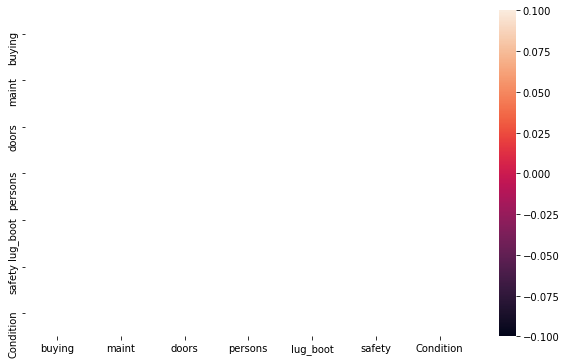

In [51]:
#Correlation map to see how features are correlated
fig=plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),annot=True)

In [52]:
#dividing dataset into X and y
X=df[df.columns[:-1]]
y=df['Condition']

In [57]:
#splitting dataset into training and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [58]:
#import necessary libraries for Logistic Regression, Cross Validation, and Model Selection
from sklearn.model_selection import learning_curve,cross_val_score,validation_curve
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split,cross_val_score, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix

param_grid={'C':[0.01,0.1,1,10],
           'solver':['newton-cg', 'lbfgs', 'sag'],
           'multi_class':['multinomial']}
model=GridSearchCV(estimator=LogisticRegression(n_jobs=-1),param_grid=param_grid,cv=10,n_jobs=-1)

In [59]:
model.fit(X_train,y_train)

ValueError: ignored

In [60]:
print(model.best_params_)
print(model.best_score_)

AttributeError: ignored

In [ ]:
pred = model.predict(X_test)

In [ ]:
#predicting for following attributes : buying, maint, doors, persons, lug_boot, safety as [vhigh,low,4,more,small,med]
new_prediction = model.predict(np.array([[4, 1, 4, 5,1,2]]))
new_prediction

array([1], dtype=int64)

In [61]:
## Confusion Matrix
cm_ = confusion_matrix(y_test, pred)

LABELS = ['1', '2', '3', '4']
sns.heatmap(cm_, annot=True, xticklabels=LABELS, yticklabels=LABELS, fmt='g')
xl = plt.xlabel("Predicted")
yl = plt.ylabel("Actuals")

NameError: ignored

In [ ]:
#plotting decision boundary
import matplotlib.pyplot as plt
def plot_decisionboundary(classifier_plt, xx, yy):
    colors = "rgb"
    Z = classifier_plt.predict(np.c_[xx.ravel(), yy.ravel()])
    pd.DataFrame(Z,columns=['hi'])['hi'].value_counts()
    Z = Z.reshape(xx.shape)
    plt.figure(figsize=(10,5))
    plt.subplot(1,2,1)
    cs = plt.contourf(xx,yy,  Z, cmap = ListedColormap(('red', 'green', 'blue', 'yellow')))
    plt.subplot(1,2,2)
    cs = plt.contourf(xx,yy,  Z, cmap = ListedColormap(('red', 'green', 'blue', 'yellow')))


    # Plot also the training points
    for i, color in zip(classifier_plt.classes_, colors):
        idx = np.where(y_train == i)
        plt.subplot(1,2,1)
        plt.scatter(X_train.values[idx, 0], X_train.values[idx, 1], c=color, label=['0', '1'][i],cmap = ListedColormap(('red', 'green', 'blue', 'yellow')), edgecolor='black', s=20)
        plt.axis('tight')
        plt.subplot(1,2,2)
        idx = np.where(y_test == i)
        plt.scatter(X_test.values[idx, 0], X_test.values[idx, 1], c=color, label=['0', '1'][i],cmap = ListedColormap(('red', 'green', 'blue', 'yellow')), edgecolor='black', s=20)

    plt.title("Plot the decision boundary, visualize training and test results")
    plt.legend()

In [ ]:
from matplotlib.colors import ListedColormap
h = 0.01 # step size in the mesh
x = 1

x1_min, x1_max = X_train.values[:, 0].min() - x, X_train.values[:, 0].max() + x
y1_min, y1_max = X_train.values[:, 1].min() - x, X_train.values[:, 1].max() + x

xx1, yy1 = np.meshgrid(np.arange(x1_min, x1_max, h), np.arange(y1_min, y1_max, h))

C:\Users\ajang\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ajang\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\ajang\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "
C:\Users\ajang\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWar

IndexError: list index out of range

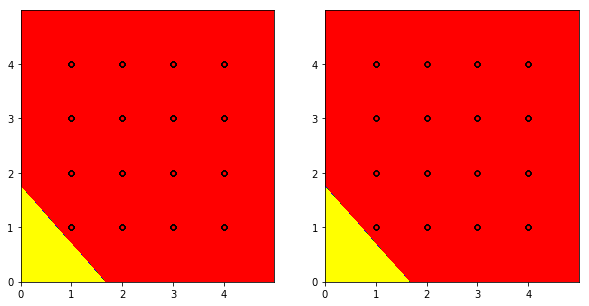

In [ ]:
LR = LogisticRegression()
LR.fit(X_train.values[:, :2], y_train)
plot_decisionboundary(LR, xx1, yy1)